# Import Libraries 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import csv

# Import Dataset from MOH Github Page

In [2]:
cases_by_death = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_state.csv')
cases_by_vaccination = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/vaccination/vax_state.csv')

# Explore the Dataset

## Get the First 5 Row of Each Dataset

In [3]:
cases_by_death.head()

,date,state,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,deaths_tat
0,2020-03-17,Johor,1,0,1,0,1,0,0,0,0
1,2020-03-17,Kedah,0,0,0,0,0,0,0,0,0
2,2020-03-17,Kelantan,0,0,0,0,0,0,0,0,0
3,2020-03-17,Melaka,0,0,0,0,0,0,0,0,0
4,2020-03-17,Negeri Sembilan,0,0,0,0,0,0,0,0,0


In [4]:
cases_by_vaccination.head()

,date,state,daily_partial,daily_full,daily_booster,daily_booster2,daily,daily_partial_adol,daily_full_adol,daily_booster_adol,...,sinopharm2,sinopharm3,sinopharm4,cansino,cansino3,cansino4,pending1,pending2,pending3,pending4
0,2021-02-24,Johor,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-24,Kedah,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-24,Kelantan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-02-24,Melaka,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-02-24,Negeri Sembilan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Get Dataset Information 

In [5]:
cases_by_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13552 entries, 0 to 13551
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            13552 non-null  object
 1   state           13552 non-null  object
 2   deaths_new      13552 non-null  int64 
 3   deaths_bid      13552 non-null  int64 
 4   deaths_new_dod  13552 non-null  int64 
 5   deaths_bid_dod  13552 non-null  int64 
 6   deaths_unvax    13552 non-null  int64 
 7   deaths_pvax     13552 non-null  int64 
 8   deaths_fvax     13552 non-null  int64 
 9   deaths_boost    13552 non-null  int64 
 10  deaths_tat      13552 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.1+ MB


In [6]:
cases_by_vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8048 entries, 0 to 8047
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  8048 non-null   object
 1   state                 8048 non-null   object
 2   daily_partial         8048 non-null   int64 
 3   daily_full            8048 non-null   int64 
 4   daily_booster         8048 non-null   int64 
 5   daily_booster2        8048 non-null   int64 
 6   daily                 8048 non-null   int64 
 7   daily_partial_adol    8048 non-null   int64 
 8   daily_full_adol       8048 non-null   int64 
 9   daily_booster_adol    8048 non-null   int64 
 10  daily_booster2_adol   8048 non-null   int64 
 11  daily_partial_child   8048 non-null   int64 
 12  daily_full_child      8048 non-null   int64 
 13  daily_booster_child   8048 non-null   int64 
 14  daily_booster2_child  8048 non-null   int64 
 15  cumul_partial         8048 non-null   

## Get Dataset Description

In [7]:
cases_by_death.describe()

,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,deaths_tat
count,13552.000000,13552.000000,13552.000000,13552.000000,13552.000000,13552.000000,13552.000000,13552.000000,13552.000000
mean,2.642857,0.560434,2.642857,0.560434,1.633117,0.464212,0.484578,0.060950,1.563459
std,9.906430,2.884853,9.622862,2.458849,6.238619,2.939814,1.419390,0.374611,6.771547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,359.000000,84.000000,191.000000,63.000000,119.000000,68.000000,18.000000,9.000000,204.000000


In [8]:
cases_by_vaccination.describe()

,daily_partial,daily_full,daily_booster,daily_booster2,daily,daily_partial_adol,daily_full_adol,daily_booster_adol,daily_booster2_adol,daily_partial_child,...,sinopharm2,sinopharm3,sinopharm4,cansino,cansino3,cansino4,pending1,pending2,pending3,pending4
count,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000,...,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000
mean,3458.715333,3397.539886,2007.382083,20.780567,8884.417868,369.585736,359.440358,5.505094,0.022614,219.501615,...,1.976640,1.201541,0.007952,26.775969,0.952286,0.010562,1.337972,0.932530,0.366178,0.119906
std,8429.061159,8294.149594,5881.853364,85.085643,15324.267245,1910.848476,1859.215553,16.518623,0.181773,913.519567,...,9.770459,9.539458,0.110069,252.796947,12.506331,0.260984,13.792236,8.329089,2.987482,6.036994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,71.000000,55.000000,0.000000,0.000000,712.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,458.000000,386.000000,12.000000,0.000000,2867.500000,12.000000,12.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2431.000000,2329.750000,876.750000,10.000000,10297.750000,76.000000,69.000000,3.000000,0.000000,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,110484.000000,110911.000000,74326.000000,1887.000000,176403.000000,29288.000000,26731.000000,246.000000,4.000000,19902.000000,...,225.000000,255.000000,3.000000,7705.000000,441.000000,19.000000,462.000000,374.000000,116.000000,494.000000


## Get Dataset Size

In [9]:
cases_by_death.size

149072

In [10]:
cases_by_vaccination.size

410448

## Get Dataset Shape

In [11]:
cases_by_death.shape

(13552, 11)

In [12]:
cases_by_vaccination.shape

(8048, 51)

## Find Duplicates in the Dataset

In [13]:
cases_by_death.duplicated().sum()

0

In [14]:
cases_by_vaccination.duplicated().sum()

0

## Find Null Values in the Dataset

In [15]:
cases_by_death.isnull().sum()

date              0
state             0
deaths_new        0
deaths_bid        0
deaths_new_dod    0
deaths_bid_dod    0
deaths_unvax      0
deaths_pvax       0
deaths_fvax       0
deaths_boost      0
deaths_tat        0
dtype: int64

In [16]:
cases_by_vaccination.isnull().sum()

date                    0
state                   0
daily_partial           0
daily_full              0
daily_booster           0
daily_booster2          0
daily                   0
daily_partial_adol      0
daily_full_adol         0
daily_booster_adol      0
daily_booster2_adol     0
daily_partial_child     0
daily_full_child        0
daily_booster_child     0
daily_booster2_child    0
cumul_partial           0
cumul_full              0
cumul_booster           0
cumul_booster2          0
cumul                   0
cumul_partial_adol      0
cumul_full_adol         0
cumul_booster_adol      0
cumul_booster2_adol     0
cumul_partial_child     0
cumul_full_child        0
cumul_booster_child     0
cumul_booster2_child    0
pfizer1                 0
pfizer2                 0
pfizer3                 0
pfizer4                 0
sinovac1                0
sinovac2                0
sinovac3                0
sinovac4                0
astra1                  0
astra2                  0
astra3      

# Data Preparation 

## Dropping Unrelated Columns 

In [17]:
cases_by_death = cases_by_death[['date','state','deaths_new']]

In [18]:
cases_by_vaccination = cases_by_vaccination[['date','state','daily']]

## Converting Date Format for the Dataset

In [19]:
cases_by_death['date'] = pd.to_datetime(cases_by_death['date']).dt.to_period('M')

In [20]:
cases_by_vaccination['date'] = pd.to_datetime(cases_by_vaccination['date']).dt.to_period('M')

## Sum up Specific Cases Using Date and State

In [21]:
cases_by_death = cases_by_death.groupby(['date','state']).sum().reset_index()

In [22]:
cases_by_vaccination = cases_by_vaccination.groupby(['date','state']).sum().reset_index()

In [26]:
cases_by_vaccination

,date,state,daily
0,2021-02,Johor,913
1,2021-02,Kedah,829
2,2021-02,Kelantan,162
3,2021-02,Melaka,275
4,2021-02,Negeri Sembilan,1
...,...,...,...
283,2022-07,Selangor,27365
284,2022-07,Terengganu,2641
285,2022-07,W.P. Kuala Lumpur,16592
286,2022-07,W.P. Labuan,279


## Combine the Death and Vaccination Dataset

In [23]:
final_dataset = pd.merge(cases_by_death, cases_by_vaccination, on = ['date','state'],how='inner')

## Rename the Columns

In [29]:
final_dataset.columns = ['Date', 'State', 'Total Death', 'Total Vaccination']

## View the New Dataset

In [32]:
final_dataset.head()

,Date,State,Total Death,Total Vaccination
0,2021-02,Johor,29,913
1,2021-02,Kedah,5,829
2,2021-02,Kelantan,8,162
3,2021-02,Melaka,9,275
4,2021-02,Negeri Sembilan,10,1


# Find Correlation Between Data

<AxesSubplot:>

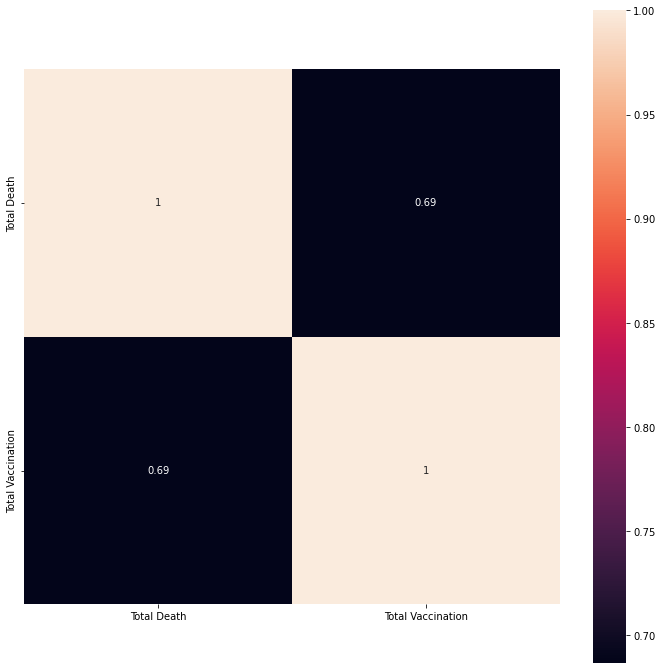

In [33]:
death_correlation = final_dataset.corr() #find correlation 
plt.subplots(figsize=(12,12)) #determine size of chart
sns.heatmap(death_correlation,annot=True, square=True) # plot heatmap 

# Export the Dataset as CSV

In [35]:
final_dataset.to_csv('death_to_vacc_dataset.csv', index = False)